# Linear regression

+ Là thuật toán cố gắng tìm một phường trình: đường thẳng, mặt phẳng, siêu phẳng,… fit với bộ data traning (tìm giá trị 
w
 và 
b
) thể hiện linear relationship của các feature vs target. Với mục đích để dự đoán một biến dựa trên giá trị của biến khác. Giá trị muốn predict được gọi là dependent variale, giá trị được sử dụng để predict được gọi là independent variable.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [8]:
!wget https://archive.org/download/kc_house_data/kc_house_data.csv

--2024-10-31 08:47:55--  https://archive.org/download/kc_house_data/kc_house_data.csv
Resolving archive.org (archive.org)... 64:ff9b::cff1:e002, 207.241.224.2
Connecting to archive.org (archive.org)|64:ff9b::cff1:e002|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ia801005.us.archive.org/28/items/kc_house_data/kc_house_data.csv [following]
--2024-10-31 08:47:56--  https://ia801005.us.archive.org/28/items/kc_house_data/kc_house_data.csv
Resolving ia801005.us.archive.org (ia801005.us.archive.org)... 64:ff9b::cff1:e455, 207.241.228.85
Connecting to ia801005.us.archive.org (ia801005.us.archive.org)|64:ff9b::cff1:e455|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2226636 (2,1M) [text/csv]
Saving to: ‘kc_house_data.csv’

kc_house_data.csv   100%[===================>]   2,12M  1,66MB/s    in 1,3s    

2024-10-31 08:47:58 (1,66 MB/s) - ‘kc_house_data.csv’ saved [2226636/2226636]



In [9]:
df = pd.read_csv("/home/dekiru/Desktop/AILAB/Linear Regression/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<Axes: >

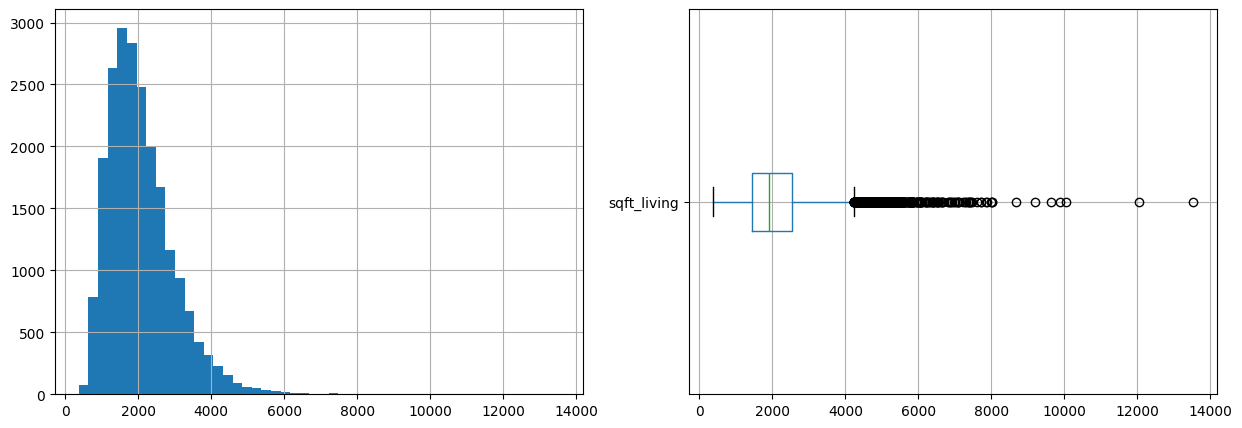

In [11]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 5))
df.iloc[:, 5].hist(bins= 50, ax=axes[0])
df.iloc[:, 5].to_frame().boxplot(ax=axes[1], vert=False)

=>You can see Imbalance datas => Use boxplot to execute

In [12]:
from typing import Tuple
from sklearn.base import BaseEstimator, TransformerMixin

def find_boxplot_boundaries(col: pd.Series, whisker_coeff: 1.5) -> Tuple[float, float]:
  '''
    Find minimum and maximum in boxplot
    Args:
      col: a pandas series of input
      whisker_coeff: whisker coefficient in box plot
  '''
  Q1 = col.quantile(0.25)
  Q3 = col.quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - whisker_coeff * IQR
  upper = Q3 + whisker_coeff * IQR
  return lower, upper

class BoxplotOutlierClipper(BaseEstimator, TransformerMixin):
  def __init__(self, whisker_coeff: float = 1.5):
    self.whisker = whisker_coeff
    self.lower = None
    self.upper = None
  def fit(self, X: pd.Series):
    self.lower, self.upper = find_boxplot_boundaries(X, self.whisker)
    return self
  def transform(self, X):
    return X.clip(self.lower, self.upper)

<Axes: >

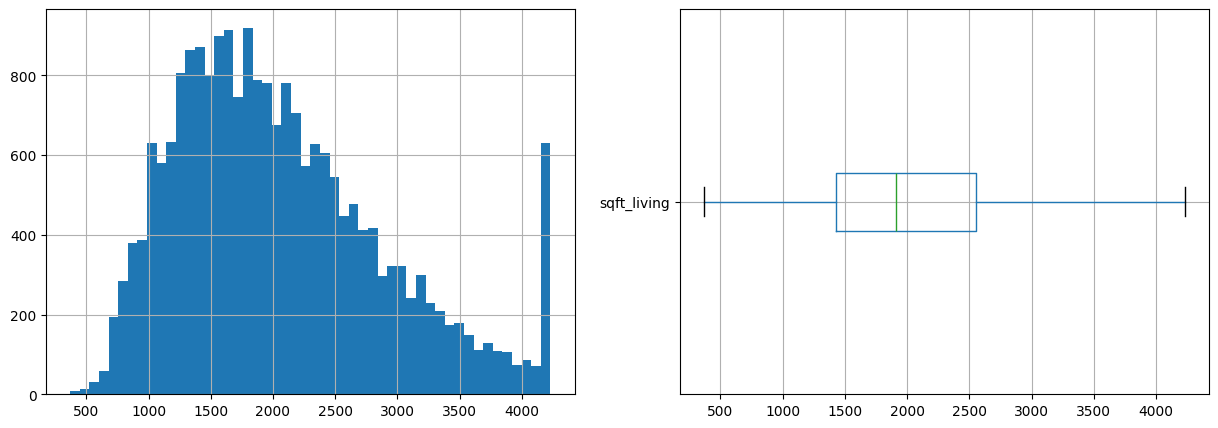

In [13]:
clipped_sqft_living = BoxplotOutlierClipper().fit_transform(df.iloc[:, 5])

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
clipped_sqft_living.hist(bins = 50, ax = axes[0])
clipped_sqft_living.to_frame().boxplot(ax = axes[1], vert = False)

In [14]:
# Do the same with col 12
clipped_sqft_above = BoxplotOutlierClipper().fit_transform(df.iloc[:, 12])

###  Now, we will use col 2 and 5 to practice

Text(0, 0.5, 'Price')

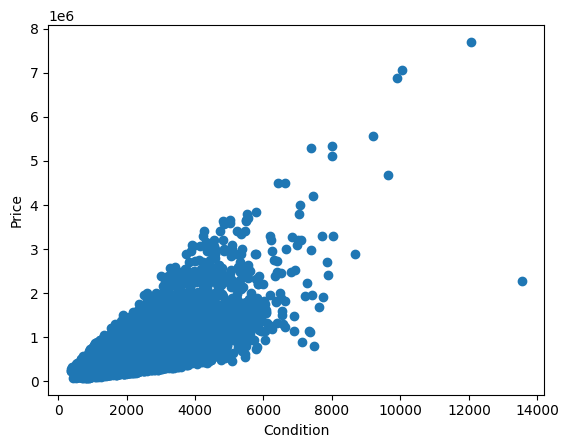

In [15]:
# Before use boxplot
feature = np.array([df.iloc[:, 5].to_list()]).T
variable = np.array([df.iloc[:, 2].to_list()]).T
plt.scatter(feature, variable)
plt.xlabel("Condition")
plt.ylabel("Price")

+ Visual when preprocessing data

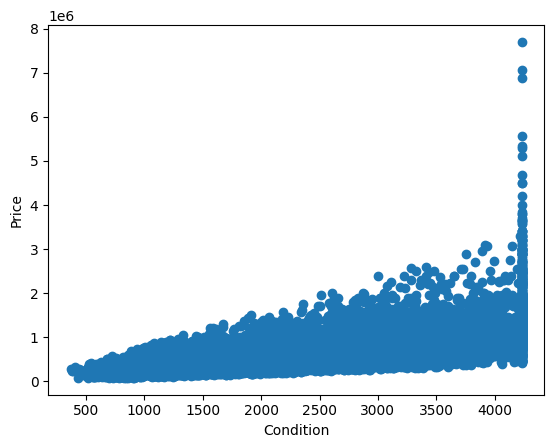

In [16]:
# After use boxplot
variable = np.array([df.iloc[:, 2].to_list()]).T
plt.scatter(clipped_sqft_living, variable)
plt.xlabel("Condition")
plt.ylabel("Price")
plt.show()

## Create new DataFrame with two feature is sqft_living and sqft_above

In [25]:

data = np.concatenate((np.array([clipped_sqft_living]).T, np.array([clipped_sqft_above]).T, np.array([df.iloc[:, 2].to_list()]).T), axis=1)
data = pd.DataFrame(data)
data.head()

,0,1,2
0,1180.0,1180.0,221900.0
1,2570.0,2170.0,538000.0
2,770.0,770.0,180000.0
3,1960.0,1050.0,604000.0
4,1680.0,1680.0,510000.0


In [32]:
# Create data and label
X = data.iloc[:, :2]
Y = data.iloc[:, 2]

In [34]:
# Split data into train and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=True)
print("Train size: ", len(x_train))
print("Test size: ", len(x_test))

Train size:  17277
Test size:  4320


In [35]:
# Apply Linear Regression for train data

#Building Xbar

...

# Caculating weights of the fitting line


In [36]:
def predict(x):
    ...

In [37]:
def compute_cost(y, y_):
    ...

# Perform with sklearn

In [38]:
regr = LinearRegression()

regr.fit(x_train, y_train)

print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [284.56920535  -3.13427535]
Intercept:  -39601.81165780383


In [ ]:

from sklearn.metrics import r2_score

test_y_pre = regr.predict(x_test)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_pre - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_pre - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test , test_y_pre))

test_y_ = predict(x_test)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test , test_y_))
print("Cost: %.2f" % compute_cost(y_test , test_y_) )

In [41]:
xy_plt = np.concatenate([np.linspace(1000, 6000, 100)[:, None], np.linspace(2000, 8000, 100)[:, None]], axis=1)

X, Y = np.meshgrid(xy_plt[:, 0], xy_plt[:, 1])
zs = np.array([regr.predict([[x, y]]) for x, y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

In [49]:
x_train.iloc[:, 0]

5931     1780.0
19984    1260.0
13637    2140.0
11462    1340.0
19036    1040.0
          ...  
10955    2420.0
17289    1060.0
5192     1540.0
12172    2420.0
235      3760.0
Name: 0, Length: 17277, dtype: float64

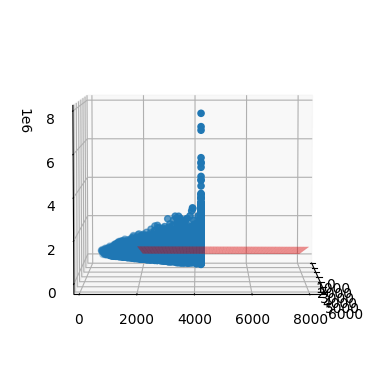

In [50]:
ax = plt.axes(projection='3d')
ax.view_init(5, 0) # change view to see more

ax.scatter3D(x_train.iloc[:, 0], x_train.iloc[:, 0], y_train, 'blue')

ax.plot_surface(X, Y, Z, color='r', alpha=0.5)